In [1]:
import os 
import numpy as np

data_path=r'D:\KAVEESHA\DataScience\Resourses\kagglecatsanddogs_5340\PetImages'
categories=os.listdir(data_path)
print(categories)

labels=np.arange(len(categories))
print(labels)

label_dict=dict(zip(categories,labels))
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


### cv2: OpenCV library for reading and processing images.

##### cv2.imread(img_path)	- Loads the image from disk
##### cv2.cvtColor(..., COLOR_BGR2GRAY)	- Converts the image to grayscale (1 channel) to reduce complexity
##### cv2.resize(..., (img_size, img_size))	- Resizes image to 50x50 pixels
##### data.append(img)	- Adds processed image to your list
##### target.append(label_dict[category])	- Adds the label (e.g., 0 for Cat) using the dictionary you created earlier

In [19]:
import cv2

img_size=50  # TO convert all images to same size

data=[]
target=[]
count = 0

for category in categories:
    
    category_path= os.path.join(data_path,category)
    #print(img_path)
    
    img_names=os.listdir(category_path)
    #print(img_names)
    
    for img_name in img_names:
        if(count%2000 == 0):
            print(count)
        #print(img_name)
        img_path=os.path.join(category_path,img_name)
        #print(img_path)

        # img = cv2.imread(img_path)
        # cv2.imshow('LIVE',img)
        # k = cv2.waitKey(1000)
        
        try:
             img=cv2.imread(img_path)
             img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
             img=cv2.resize(img,(img_size,img_size))

             data.append(img)
             target.append(label_dict[category])
             count += 1
        except Exception as e:
             print(img_path,e)

0
D:\KAVEESHA\DataScience\Resourses\kagglecatsanddogs_5340\PetImages\Cat\10125.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

D:\KAVEESHA\DataScience\Resourses\kagglecatsanddogs_5340\PetImages\Cat\10404.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

D:\KAVEESHA\DataScience\Resourses\kagglecatsanddogs_5340\PetImages\Cat\10501.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

D:\KAVEESHA\DataScience\Resourses\kagglecatsanddogs_5340\PetImages\Cat\10820.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

D:\KAVEESHA\DataScienc

In [7]:
data_new=np.array(data)
target_new=np.array(target)

In [8]:
print(data_new.shape)
print(target_new.shape)

(24946, 50, 50)
(24946,)


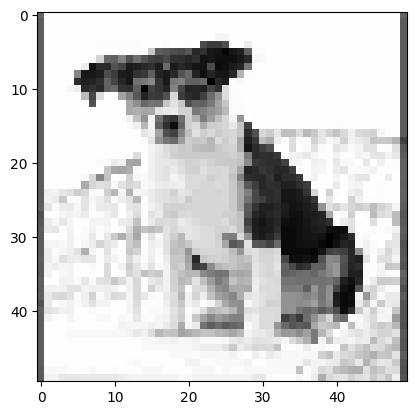

In [12]:
from matplotlib import pyplot as plt

plt.imshow(data[16000],cmap='gray')

In [22]:
target_new[100]

array([1., 0.])

In [23]:
print(data_new.shape)
print(data_new.shape[0],data_new.shape[1],data_new.shape[2])

(24946, 50, 50, 1)
24946 50 50


In [24]:
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(24946, 50, 50, 1)


In [25]:
data_new=data_new/255 #normalizing/ Scaling -

from keras import utils

target_new=utils.to_categorical(target_new)

In [26]:
np.save('data',data_new)
np.save('target',target_new)